In [1]:
import local_models.local_models as local_models
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.cluster
from importlib import reload
from ml_battery.utils import cmap
import matplotlib as mpl
reload(local_models)
mpl.rcParams['figure.figsize'] = [8.0, 8.0]

In [118]:
n = 100
sigma = 0.1
k = 25

In [119]:
x = np.linspace(0.,2.,n)

In [120]:
def yer(x):
    return 5*x*np.sin(np.pi*x) + 3*x**2 + 2*x + 4 + np.random.normal(0,sigma,n)

In [121]:
y = yer(x)
big_x = np.linspace(-1.,3.,n)
big_y = yer(big_x)

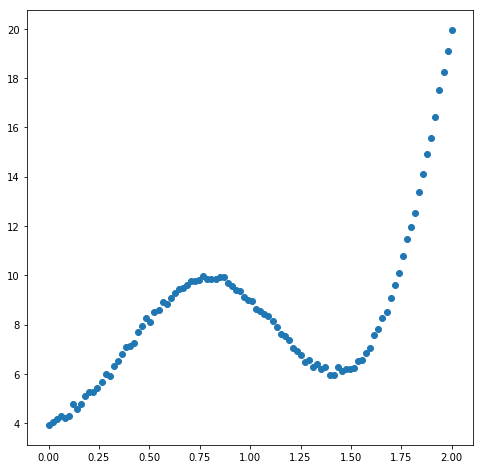

In [122]:
plt.scatter(x,y)
plt.show()

In [123]:
models = local_models.LocalModels(sklearn.linear_model.LinearRegression())

In [124]:
models.fit(x.reshape((-1,1)), y, np.stack((x,y)).T)

In [125]:
lm_params = models.transform(np.stack((x,y)).T,k=k)

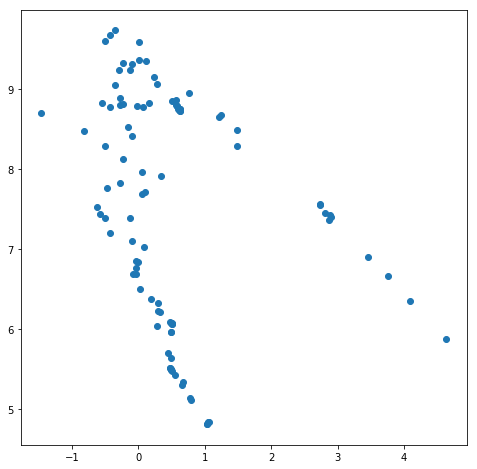

In [126]:
plt.scatter(lm_params[:,0], lm_params[:,1])
plt.show()

In [127]:
big_model = sklearn.linear_model.LinearRegression()

In [128]:
mod_x = np.concatenate((x.reshape((-1,1)), lm_params), axis=1)

In [129]:
mod_x.shape

(100, 3)

In [130]:
big_model.fit(mod_x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
print(big_x.shape, big_y.shape)
print(x.shape, y.shape)

(100,) (100,)
(100,) (100,)


In [132]:
big_lm_params = models.transform(np.stack((big_x,big_y)).T, k=k)
mod_big_x = np.concatenate((big_x.reshape((-1,1)), big_lm_params), axis=1)

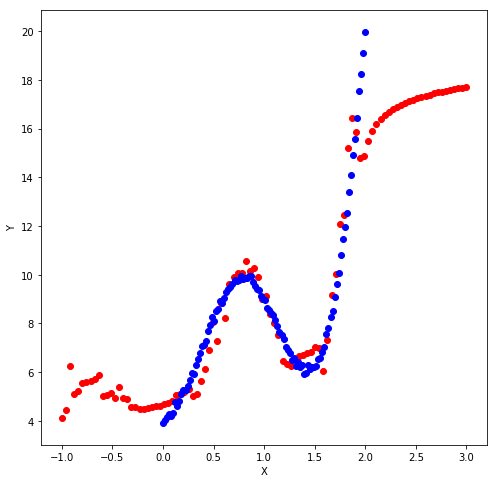

In [136]:
plt.scatter(big_x,big_model.predict(mod_big_x), c='r')
plt.scatter(x,y,c='b')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [146]:
big_model2 = sklearn.linear_model.LinearRegression()

In [147]:
mod_x = np.concatenate((x.reshape((-1,1)), lm_params[:,1:]), axis=1)

In [148]:
mod_x.shape

(100, 2)

In [149]:
big_model.fit(mod_x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
print(big_x.shape, big_y.shape)
print(x.shape, y.shape)

(100,) (100,)
(100,) (100,)


In [151]:
big_lm_params = models.transform(np.stack((big_x,big_y)).T, k=k)
mod_big_x = np.concatenate((big_x.reshape((-1,1)), big_lm_params[:,1:]), axis=1)

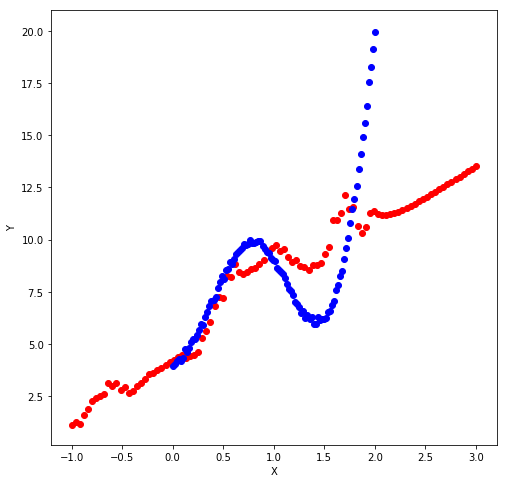

In [152]:
plt.scatter(big_x,big_model.predict(mod_big_x), c='r')
plt.scatter(x,y,c='b')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()